# 从线性回归到神经网络之线性回归篇

In [1]:
from random import uniform

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sys

from dask.array import meshgrid
from matplotlib.colors import ListedColormap
from matplotlib.lines import lineStyles
from networkx import neighbors
from sklearn.metrics import confusion_matrix
from streamlit import columns, metric
from sympy.printing.pretty.pretty_symbology import line_width

print('Python version:', sys.version)
print('Pandas version:', pd.__version__)
print('Numpy version:', np.__version__)
print('Matplotlib version:', matplotlib.__version__)

Python version: 3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]
Pandas version: 2.2.2
Numpy version: 1.26.4
Matplotlib version: 3.8.4


In [2]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNeighborsClassifier

In [2]:
import seaborn as sns
plt.rcParams['font.sans-serif'] = 'STsong'
plt.rcParams['font.size'] = 14

In [10]:
data = pd.read_csv('./data/Advertising.csv',encoding = 'utf-8')
data.head()

,index,微信,微博,抖音,销售额
0,0,231.1,41.8,73.2,26.1
1,1,48.5,42.3,50.1,11.4
2,2,22.2,48.9,71.3,10.3
3,3,153.5,42.3,60.5,23.5
4,4,181.8,14.8,59.4,15.9


In [11]:
data.columns

Index(['index', '微信', '微博', '抖音', '销售额'], dtype='object')

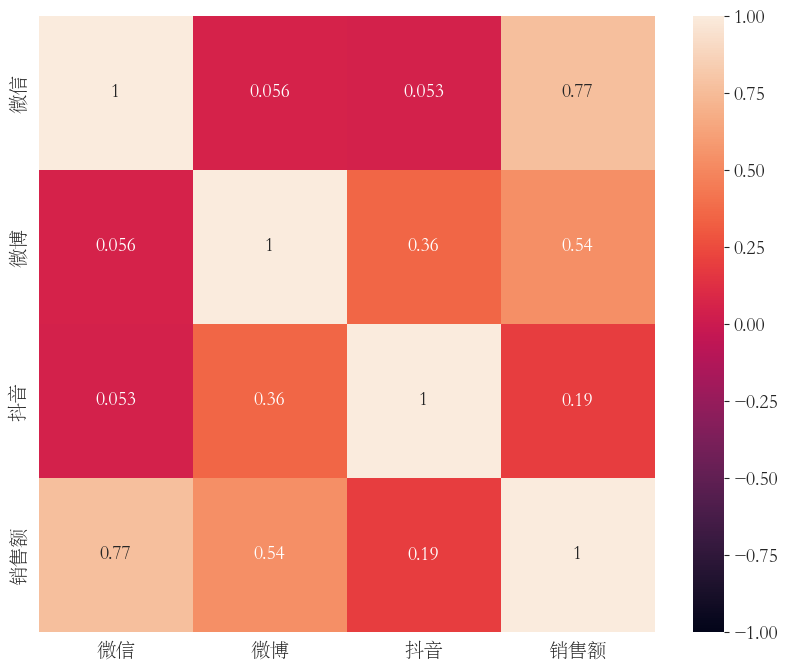

In [13]:
import seaborn as sns
plt.figure(figsize=(10,8),dpi=100)

sns.heatmap(
    data = data.iloc[:,1:].corr(), # 传入相关系数矩阵
    annot=True,  # 是否显示文本标记
    square=True, # 是否显示为正方形
    vmax=1,  # 设定最大值
    vmin=-1, # 设定最小值
)
plt.savefig('./result/各个列的线性关系.png')

## 数据划分
- 测试集完全独立于模型的训练过程
- 先划分为X_train, X_test, y_train, y_test一系列数据集再进行后面数据的归一化

In [15]:
X = data['微信'].to_numpy()
print(X.shape)
X = X.reshape(X.shape[0],1)#转换为多行一列(200,1)的形式,之前是(200,)的形式
print(X.shape)

(200,)
(200, 1)


In [16]:
y = data['销售额'].to_numpy()
y = y.reshape(y.shape[0],1)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1210)

In [22]:
X_train.shape

(160, 1)

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()
X_train,X_test = scaler.fit_transform(X_train),scaler.fit_transform(X_test)
y_train,y_test = scaler.fit_transform(y_train),scaler.fit_transform(y_test)

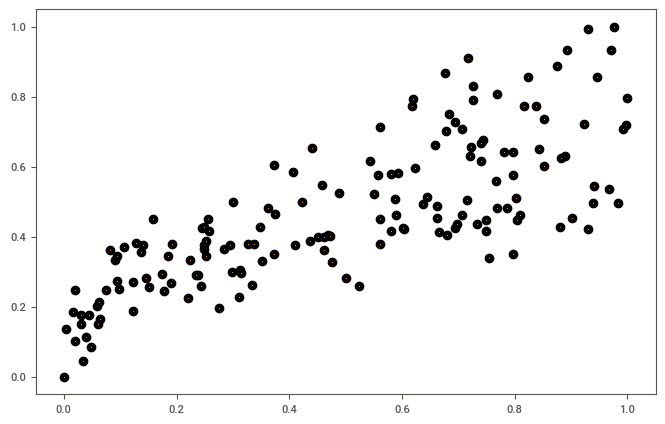

In [50]:
plt.figure(figsize=(8,5),dpi=100)
plt.scatter(X_train,y_train,edgecolors='black',lw = 4,color = 'orange',marker = 'o')
plt.savefig('./result/微信和销售图.png')

## 模型确定
- 机器学习中,表示为y=kx+b,其中w表示权重,b表示偏执
- 


In [16]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

In [23]:
# 定义线性回归预测函数,返回每一个预测值
def predict(weight,bias,X): # 定义损失函数
    y_hat = weight * X + bias # 这是假设函数
    return y_hat # 返回预测的结果

In [24]:
# 定义损失函数,返回所有损失值的均值
def cost_function(X,y,w,b): # 定义一个MSE均方误差函数
    y_hat = w * X + b # 假设函数
    loss = y_hat - y #
    cost = np.sum(loss ** 2) /len(X)
    return cost

In [7]:
np.array([1,2,4,5],ndmin=3)#admin 表示生成的是几维数组,由结果可知嵌套了三层

array([[[1, 2, 4, 5]]])

In [8]:
# 线性回归梯度下降的实现
def gradient_descent(X,y,w,b,lr,iterations):
    l_history = np.zeros(iterations)
    w_history = np.zeros(iterations)
    b_history = np.zeros(iterations)
    for iter in range(iterations):
        y_hat = w * X + b
        loss = y_hat -y
        derivative_weight = X.T.dot(loss)/len(X) *2
        derivative_bias = sum(loss) * 1/len(X) *2
        w = w - lr * derivative_weight
        b = b - lr * derivative_bias
        l_history[iter] = cost_function(X,y,w,b)
        w_history[iter] = w
        b_history[iter] = b
        return l_history,w_history,b_history

In [23]:
import func1
func1.

array([-5.        , -4.8989899 , -4.7979798 , -4.6969697 , -4.5959596 ,
       -4.49494949, -4.39393939, -4.29292929, -4.19191919, -4.09090909,
       -3.98989899, -3.88888889, -3.78787879, -3.68686869, -3.58585859,
       -3.48484848, -3.38383838, -3.28282828, -3.18181818, -3.08080808,
       -2.97979798, -2.87878788, -2.77777778, -2.67676768, -2.57575758,
       -2.47474747, -2.37373737, -2.27272727, -2.17171717, -2.07070707,
       -1.96969697, -1.86868687, -1.76767677, -1.66666667, -1.56565657,
       -1.46464646, -1.36363636, -1.26262626, -1.16161616, -1.06060606,
       -0.95959596, -0.85858586, -0.75757576, -0.65656566, -0.55555556,
       -0.45454545, -0.35353535, -0.25252525, -0.15151515, -0.05050505,
        0.05050505,  0.15151515,  0.25252525,  0.35353535,  0.45454545,
        0.55555556,  0.65656566,  0.75757576,  0.85858586,  0.95959596,
        1.06060606,  1.16161616,  1.26262626,  1.36363636,  1.46464646,
        1.56565657,  1.66666667,  1.76767677,  1.86868687,  1.96